In [ ]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### KNeighborsRegressor

+ Neste exemplo usamos a classe `KNeighborsRegressor`, que como o nome diz, é apropriada para problemas de regressão.


+ Sua documentação se encontra em: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

+ Por padrão, usa distância Euclidiana.

### Gerando os exemplos de treinamento e validação.

In [ ]:
seed = 42
np.random.seed(seed)

#### Conjunto de treinamento

In [ ]:
# Generate sample data.
N = 40

# Generate uniformly distributed from -3 to 3.
X_train = np.sort((6*np.random.rand(N, 1) - 3), axis=0)

# True function.
y = 2.0 + X_train + 0.5*X_train**2

w = np.random.randn(N,1)

# Noisy version.
y_noisy = y + w

#### Conjunto de validação

In [ ]:
# Generate validation examples.
X_test = np.linspace(-3, 3, 100).reshape(100, 1)

# True function.
y_test = 2.0 + X_test + 0.5*X_test**2

w_test = np.random.randn(100,1)

# Noisy version.
y_test_noisy = y_test + w_test

### Comparando os tipos dos pesos.

+ Usaremos inicialmente, k =5.

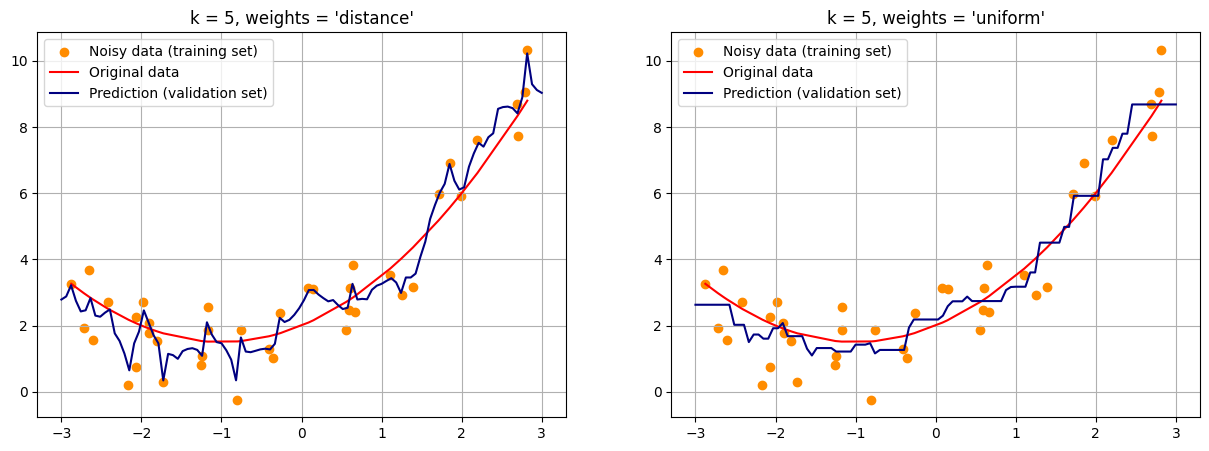

In [ ]:
# Number of neighbours.
k = 5

plt.figure(figsize=(15,5))
for i, weights in enumerate(['distance', 'uniform']):
    # Instantiate.
    knn = KNeighborsRegressor(k, weights=weights)
    # Train regression model.
    knn.fit(X_train, y_noisy)
    # Predict.
    y_pred = knn.predict(X_test)

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train, y_noisy, color='darkorange', label='Noisy data (training set)')
    plt.plot(X_train, y, color='red', label='Original data')
    plt.plot(X_test, y_pred, color='navy', label='Prediction (validation set)')
    plt.axis('tight')
    plt.legend()
    plt.grid()
    plt.title("k = %i, weights = '%s'" % (k, weights))

# Save figure
#plt.savefig("knn_regression.png", dpi=600)

#Show the plot.
plt.show()

+ Pesos uniformes resultam em uma aproximação mais "suave", pois o valor de saída será a média dos k valores.


+ Porém, com pesos inversamente proporcionais à distância, **exemplos de treinamento próximos ao exemplo de entrada terão grande influência** no valor de saída, fazendo com que ele seja bem próximo desse valor.
    + Ou seja, com pesos inversamente proporcionais à distância, a chance de sobreajuste é maior.

### Variando o valor de k entre 1 e 40 para encontrar o valor ótimo de k (validação cruzada)

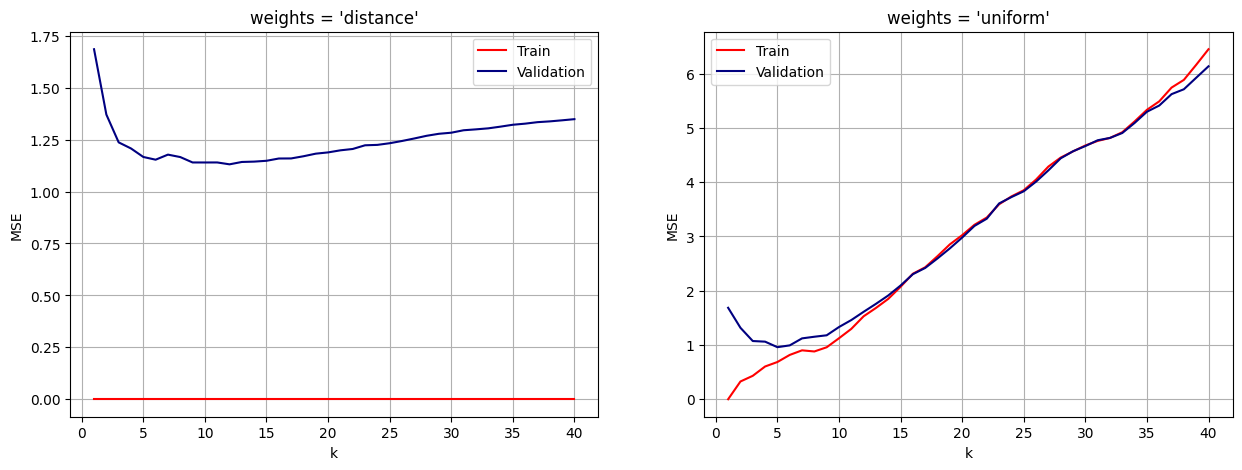

In [ ]:
mse_test = []
mse_train = []
neighbours = range(1,41)
plt.figure(figsize=(15,5))
for i, weights in enumerate(['distance', 'uniform']):
    mse_test.append([])
    mse_train.append([])
    for k in neighbours:
        # Instantiate.
        knn = KNeighborsRegressor(k, weights=weights)
        # Train model.
        knn.fit(X_train, y_noisy)
        # Predict.
        y_pred_train = knn.predict(X_train)
        y_pred_test = knn.predict(X_test)

        # calculate score.
        mse_test[i].append(mean_squared_error(y_test_noisy, y_pred_test))
        mse_train[i].append(mean_squared_error(y_noisy, y_pred_train))

    plt.subplot(1, 2, i + 1)
    plt.plot(neighbours, mse_train[i], color='red', label='Train')
    plt.plot(neighbours, mse_test[i], color='navy', label='Validation')
    plt.axis('tight')
    plt.xlabel('k')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid()
    plt.title("weights = '%s'" % (weights))

# Save figure
#plt.savefig("knn_regression.png", dpi=600)
#Show the plot.
plt.show()

+ Diferentemente do que vimos com a regressão linear, o modelo começa sobreajustando e conforme k aumenta, tende a subajustar.

### Treinando com o melhor número de vizinhos, k.

Best k: 12
Best k: 5


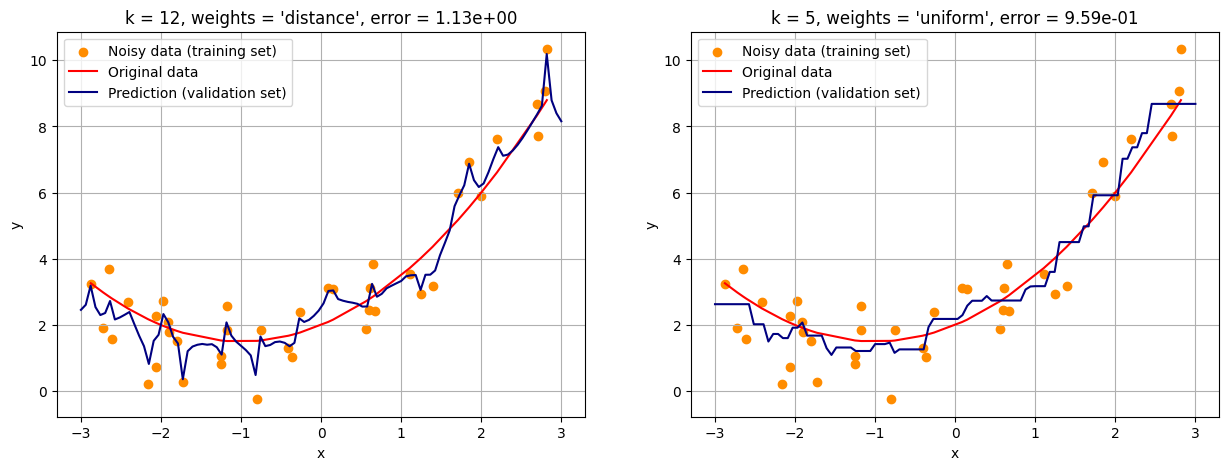

In [ ]:
plt.figure(figsize=(15,5))
for i, weights in enumerate(['distance', 'uniform']):

    # Get best k.
    k = np.argmin(mse_test[i])+1
    print('Best k:', k)

    # Instantiate.
    knn = KNeighborsRegressor(k, weights=weights)
    # Train model.
    knn.fit(X_train, y_noisy)
    # Predict.
    y_pred = knn.predict(X_test)

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train, y_noisy, color='darkorange', label='Noisy data (training set)')
    plt.plot(X_train, y, color='red', label='Original data')
    plt.plot(X_test, y_pred, color='navy', label='Prediction (validation set)')
    plt.axis('tight')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.title("k = %i, weights = '%s', error = %1.2e" % (k, weights, mse_test[i][k-1]))

# Save figure
#plt.savefig("knn_regression.png", dpi=600)

#Show the plot.
plt.show()

### Conjunto de dados maior

In [ ]:
seed = 42
np.random.seed(seed)

In [ ]:
# Generate sample data.
N = 1000

# Generate uniformly distributed from -3 to 3.
X_train = np.sort((6*np.random.rand(N, 1) - 3), axis=0)

# True function.
y = 2.0 + X_train + 0.5*X_train**2

w = np.random.randn(N,1)

# Noisy version.
y_noisy = y + w

# Generate validation examples.
X_test = np.linspace(-3, 3, 100).reshape(100, 1)

# True function.
y_test = 2.0 + X_test + 0.5*X_test**2

w_test = np.random.randn(100,1)

# Noisy version.
y_test_noisy = y_test + w_test

### Variando o valor de k entre 1 e 500 para encontrar o valor ótimo de k (validação cruzada)

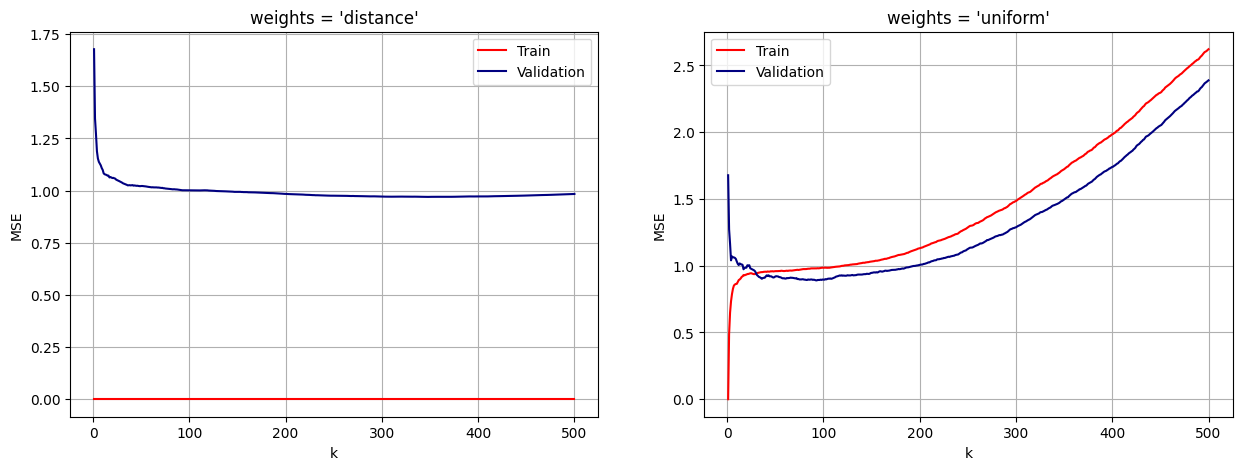

In [ ]:
mse_test = []
mse_train = []
neighbours = range(1,501)
plt.figure(figsize=(15,5))
for i, weights in enumerate(['distance', 'uniform']):
    mse_test.append([])
    mse_train.append([])
    for k in neighbours:
        # Instantiate.
        knn = KNeighborsRegressor(k, weights=weights)
        # Train model.
        knn.fit(X_train, y_noisy)
        # Predict.
        y_pred_train = knn.predict(X_train)
        y_pred_test = knn.predict(X_test)

        # calculate score.
        mse_test[i].append(mean_squared_error(y_test_noisy, y_pred_test))
        mse_train[i].append(mean_squared_error(y_noisy, y_pred_train))

    plt.subplot(1, 2, i + 1)
    plt.plot(neighbours, mse_train[i], color='red', label='Train')
    plt.plot(neighbours, mse_test[i], color='navy', label='Validation')
    plt.axis('tight')
    plt.xlabel('k')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid()
    plt.title("weights = '%s'" % (weights))

# Save figure
#plt.savefig("knn_regression.png", dpi=600)
#Show the plot.
plt.show()

### Treinando com o melhor número de vizinhos, k.

Best k: 348
Best k: 93


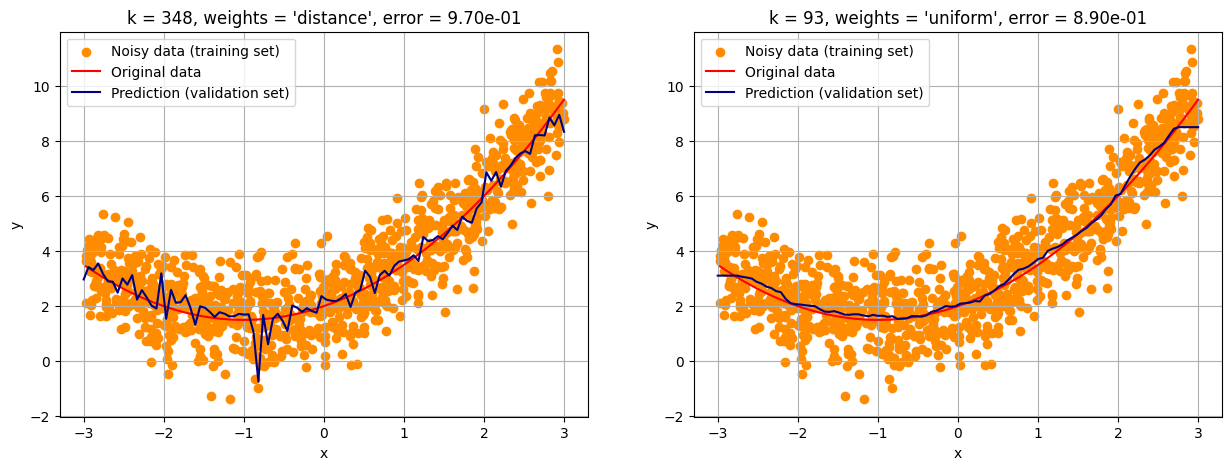

In [ ]:
plt.figure(figsize=(15,5))
for i, weights in enumerate(['distance', 'uniform']):

    # Get best k.
    k = np.argmin(mse_test[i])+1
    print('Best k:', k)

    # Instantiate.
    knn = KNeighborsRegressor(k, weights=weights)
    # Train model.
    knn.fit(X_train, y_noisy)
    # Predict.
    y_pred = knn.predict(X_test)

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_train, y_noisy, color='darkorange', label='Noisy data (training set)')
    plt.plot(X_train, y, color='red', label='Original data')
    plt.plot(X_test, y_pred, color='navy', label='Prediction (validation set)')
    plt.axis('tight')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.title("k = %i, weights = '%s', error = %1.2e" % (k, weights, mse_test[i][k-1]))

# Save figure
#plt.savefig("knn_regression.png", dpi=600)

#Show the plot.
plt.show()

#### Conclusões

+ A qualidade da aproximação melhora aumentando-se o número de amostras do conjunto de treinamento.


+ Porém, o kNN com pesos uniformes consegue capturar melhor o comportamento da função objetivo.


+ Já o kNN com pesos inversamente proporcionais à distância ainda apresenta um certo sobreajuste, mas que tende a diminuir com o aumento de k.